Team :
Name : Mohamed Ashraf Khalaf Hafez      Id : 2205201 //
Name : Khalid walid Mohamed             Id : 2205018

Libraries used

In [1]:
import numpy as np
import pandas as pd
import cv2 # for reading pics
import matplotlib.pyplot as plt
import os #  used to list the contents of a directory
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Understand the Format

In [2]:
# The dataset has 10 images per 40 subjects. Every image is a grayscale image of size 92x112.
arr = cv2.imread('./images/s1/1.pgm', 0) 
print(len(arr[0]))
print(len(arr))
print(arr) # array of pixles

92
112
[[48 49 45 ... 56 56 54]
 [45 52 39 ... 52 50 51]
 [45 50 42 ... 48 53 50]
 ...
 [50 48 50 ... 45 46 46]
 [45 54 49 ... 46 47 47]
 [51 51 51 ... 47 46 46]]


Display the first image

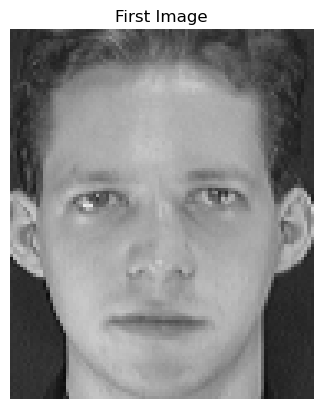

In [3]:
# Read the first face image
arr = cv2.imread('./images/s1/1.pgm')
#display the first image. 
plt.imshow(arr, cmap='gray')
plt.title('First Image')
plt.axis('off') 
plt.show()

Generate the Data Matrix and the Label vector

In [4]:
data=[]
stack=[]

#Convert every image into a vector of 10304 values corresponding to the image size.

for folder in range(1,41):
	# os.listdir ==> take file(directory) path as input and return entries inside it.
	images = os.listdir('./images/s'+str(folder))
	for image in images:
		img = cv2.imread('./images/s'+str(folder)+"/"+image,0)
		height1, width1 = img.shape[:2]
		img_col = np.array(img, dtype='float64').flatten()
		data.append(img_col)
		
		#Stack the 400 vectors into a single Data Matrix D and generate the label vector y. 
		stack.append(int(folder))

In [5]:
# image to a vector of 10304
print(len(data[0]))

10304


Split the Dataset into Training and Test sets

In [6]:
df = pd.DataFrame(data=data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,48.0,49.0,45.0,47.0,49.0,57.0,39.0,42.0,53.0,49.0,...,39.0,44.0,40.0,41.0,49.0,42.0,44.0,47.0,46.0,46.0
1,34.0,34.0,33.0,32.0,38.0,40.0,39.0,49.0,54.0,57.0,...,42.0,44.0,38.0,30.0,37.0,30.0,36.0,37.0,40.0,33.0
2,60.0,60.0,62.0,53.0,48.0,51.0,61.0,60.0,71.0,68.0,...,27.0,35.0,28.0,33.0,31.0,31.0,37.0,32.0,34.0,34.0
3,39.0,44.0,53.0,37.0,61.0,48.0,61.0,45.0,35.0,40.0,...,23.0,30.0,36.0,32.0,28.0,32.0,31.0,29.0,26.0,29.0
4,63.0,53.0,35.0,36.0,33.0,34.0,31.0,35.0,39.0,43.0,...,173.0,169.0,166.0,161.0,158.0,169.0,137.0,41.0,10.0,24.0


In [7]:
# The labels are integers from 1:40 corresponding to the subject id
df["label"] = stack
print(df)

         0      1      2      3      4      5      6      7      8      9  \
0     48.0   49.0   45.0   47.0   49.0   57.0   39.0   42.0   53.0   49.0   
1     34.0   34.0   33.0   32.0   38.0   40.0   39.0   49.0   54.0   57.0   
2     60.0   60.0   62.0   53.0   48.0   51.0   61.0   60.0   71.0   68.0   
3     39.0   44.0   53.0   37.0   61.0   48.0   61.0   45.0   35.0   40.0   
4     63.0   53.0   35.0   36.0   33.0   34.0   31.0   35.0   39.0   43.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
395  128.0  125.0  125.0  129.0  128.0  132.0  125.0  133.0  125.0  131.0   
396  123.0  121.0  126.0  122.0  127.0  127.0  123.0  124.0  123.0  127.0   
397  129.0  127.0  133.0  124.0  131.0  129.0  130.0  129.0  127.0  132.0   
398  125.0  119.0  124.0  125.0  124.0  121.0  123.0  125.0  123.0  123.0   
399  119.0  120.0  120.0  118.0  120.0  121.0  121.0  116.0  120.0  121.0   

     ...  10295  10296  10297  10298  10299  10300  10301  10302  10303  la

Split data

In [8]:
testData = df[df.index % 2 == 0]  #even rows for testing
trainData = df[df.index % 2 != 0]   #odd rows for training

Separate data from labels

In [9]:
trainFaces=trainData.drop(["label"],axis=1)
testFaces=testData.drop(["label"],axis=1)
trainTestLabels = trainData['label']

# PCA

In [10]:
# pca (principal components analysis)
# Use Dtrain only as this PCA is an unsupervised method
def pca_fun(Dtrain , alpha): # alpha ==> size of variance after projection
     
    #center the data (by subrtracting from the mean) , np.mean(Dtrain , axis = 0)==>Computes the mean of each column (feature) in the dataset.
    D_meaned = Dtrain - np.mean(Dtrain , axis = 0)

    #compute covariance matrix
    cov_mat = np.cov(D_meaned , rowvar = False)
     
    #compute eigenvalues & eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    # sort the eigenvalues and eigenvectors in descending order.
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #choose dimensionality
    # to determine the number of principal components(directions) required to retain the specified alpha (variance).
    # The first principal component captures the mostvariance, the second captures the second most, and so on.
    count=0
    var_exp=[]
    sumEigenvalues = sum(sorted_eigenvalue) #sum of eigenvalues.
    #loop over the sorted eigenvalues , until the cumulative variance (count) equal or more alpha.
    for i in sorted_eigenvalue :
      if count<alpha :
        v = i / sumEigenvalues # current 
        var_exp.append(v)
        count+=v # Updates the cumulative variance
      else:
        break
    num_components = len(var_exp) #Determines the number of principal components needed to achieve the desired variance.
    print("num_components = ",num_components)

    #reduced basis
    #to select the subset of eigenvectors corresponding to the top num_components eigenvalues.
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #reduced dimensionality data (projection data)
    D_reduced_train = np.dot(D_meaned, eigenvector_subset)
     
    return D_reduced_train,eigenvector_subset

Applying pca (my function) on the train dataset(without labels)

In [11]:
reducedTrainData,EVectors=pca_fun(trainFaces,0.8)
print(reducedTrainData)

num_components =  36
[[-2685.37610398  -664.4090988    597.22139458 ...  -150.73806863
    198.49890103   197.7245489 ]
 [-2710.3801206    -13.19586173   803.16486631 ...  -194.51786037
    -57.01908453   -11.47661223]
 [-3660.07718273  -407.15884252  -415.20511625 ...  -460.54626552
    227.15649295   -15.29802657]
 ...
 [-1358.29719478 -1301.40757022  -954.51154169 ...    27.61661123
     86.56379263  -145.76876543]
 [-1259.4397706  -1004.72878874 -1103.38287211 ...  -263.85944074
   -129.30177044   -88.38435435]
 [-1538.98164198 -1055.72046736 -1081.25616087 ...  -333.23076774
    222.01483163   245.6677013 ]]


For checking the answers of my function , use PCA function from sklearn library

In [12]:
# PCA from sklearn library
from sklearn.decomposition import PCA
pcaBuiltIn = PCA(n_components=36)
X = pcaBuiltIn.fit_transform(trainFaces)
print(X)

[[ 2685.37610384  -664.4090909    597.22135293 ...    46.63018787
   -229.01993301   271.9152857 ]
 [ 2710.3801142    -13.19585473   803.16505818 ...   157.9878192
     40.94831801   -59.18910824]
 [ 3660.07717918  -407.15884378  -415.20514917 ...   350.81674204
   -393.91302163   116.81202009]
 ...
 [ 1358.29719457 -1301.40756254  -954.51165687 ...   -87.4930709
    -62.10845279  -155.14419038]
 [ 1259.43977129 -1004.72878434 -1103.38294975 ...   246.10598833
     81.14615311  -101.9223082 ]
 [ 1538.98164593 -1055.72047435 -1081.25627816 ...   312.74444789
   -284.20387519   349.29979059]]


Show the first 5 eigen faces

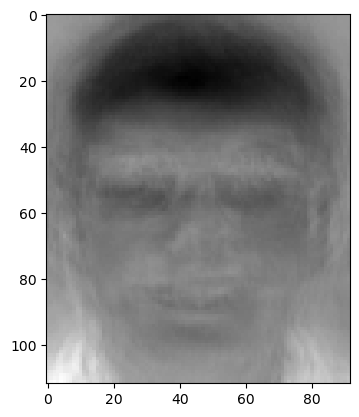

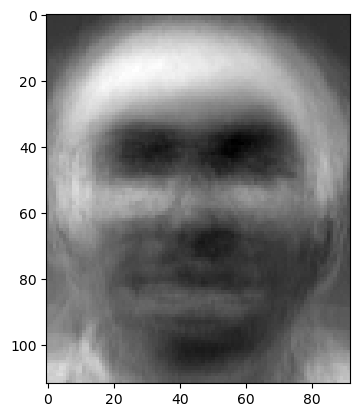

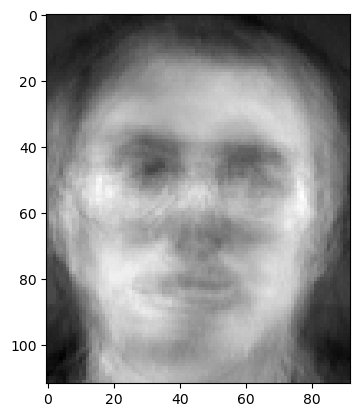

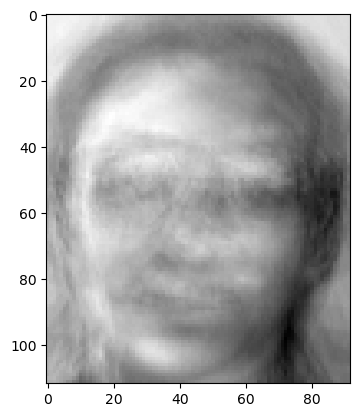

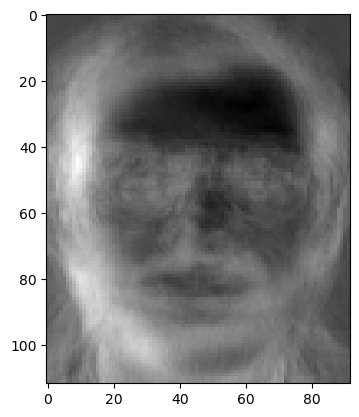

In [13]:
for i in range(5):
    plt.imshow(EVectors[:,i].reshape(112,92),cmap='gray')
    plt.show()

KNN with PCA

In [14]:
# KNN function with k = 1
def simpleClassifier(reducedTrainData,TestData,trainTestLabels):
  x = KNeighborsClassifier(n_neighbors=1, weights='distance')
  x.fit(reducedTrainData, trainTestLabels)
  score = x.score(TestData, trainTestLabels)
  y_pred=x.predict(TestData)
  print(classification_report(trainTestLabels, y_pred))
  return score

num_components =  36
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       1.00      0.80      0.89         5
          17       1.00      1.00      1.00         5
      

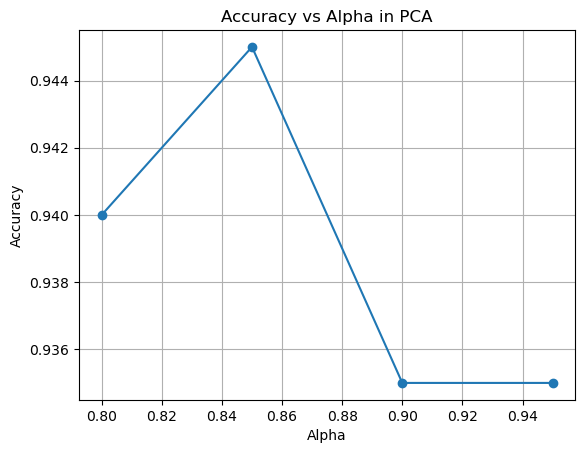

In [46]:
alphas=[0.8,0.85,0.9,0.95]
accuracies = [0,0,0,0]
counter = 0
test_data = testFaces
for alpha in alphas:
  train_data, eigen_vector= pca_fun(trainFaces,alphas[counter])
  D_meaned_test = testFaces - np.mean(testFaces , axis = 0)
  test_data = np.dot(D_meaned_test, eigen_vector)
  accuracies[counter] = simpleClassifier(train_data,test_data,trainTestLabels)
  counter+=1

plt.plot(alphas, accuracies, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha in PCA')
plt.grid(True)
plt.show()
# Support: The count of true instances for each class in the dataset.

Classifier Tuning

num_components =  36
Alpha: 0.8, K: 1
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       1.00      0.80      0.89         5
          17       1.00      1.00      1.00

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Alpha: 0.8, K: 5
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Alpha: 0.8, K: 7
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


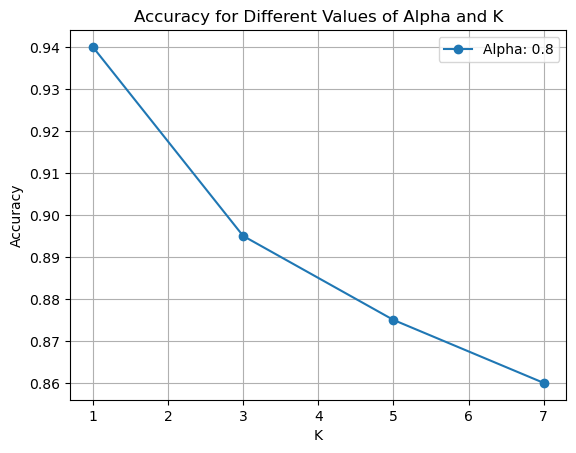

num_components =  52
Alpha: 0.85, K: 1
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       1.00      0.80      0.89         5
          17       1.00      1.00      1.0

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Alpha: 0.85, K: 5
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
         

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Alpha: 0.85, K: 7
              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
         

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


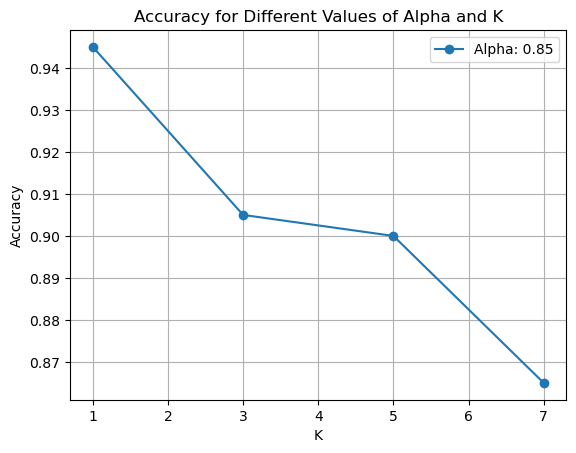

num_components =  76
Alpha: 0.9, K: 1
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       1.00      0.80      0.89         5
          17       1.00      1.00      1.00

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Alpha: 0.9, K: 5
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.45      1.00      0.62         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.62      1.00      0.77         5
          16       1.00      0.80      0.89         5
          17       1.00      1.00      1.00         5
          

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Alpha: 0.9, K: 7
              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.67      0.80      0.73         5
          16       0.80      0.80      0.80         5
          17       1.00      1.00      1.00         5
          

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


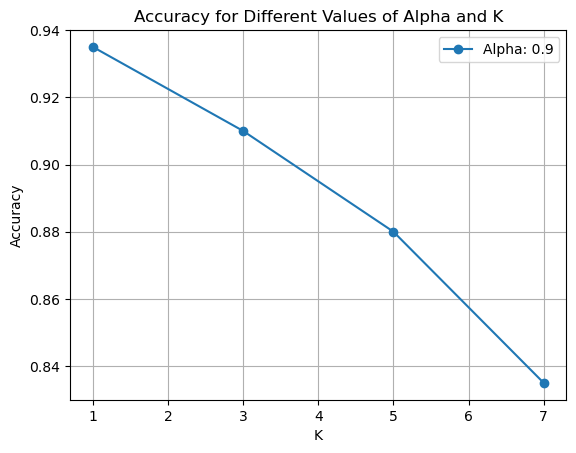

num_components =  117
Alpha: 0.95, K: 1
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      0.80      0.89         5
          17       1.00      1.00      1.

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Alpha: 0.95, K: 5
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.45      1.00      0.62         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       1.00      0.80      0.89         5
          17       1.00      1.00      1.00         5
         

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Alpha: 0.95, K: 7
              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       1.00      1.00      1.00         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.56      1.00      0.71         5
           6       1.00      1.00      1.00         5
           7       0.62      1.00      0.77         5
           8       1.00      1.00      1.00         5
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       0.80      0.80      0.80         5
          17       1.00      0.80      0.89         5
         

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


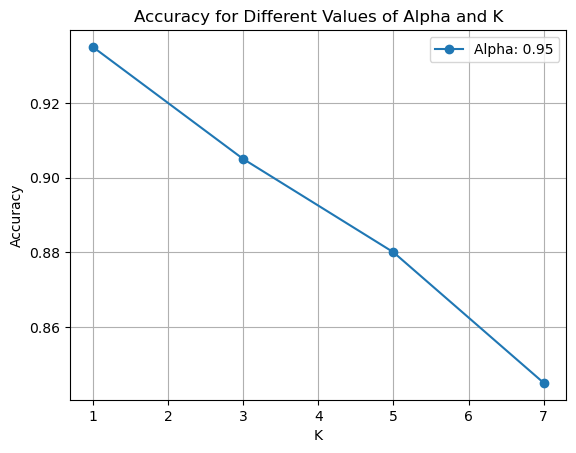

In [47]:
alphas = [0.8, 0.85, 0.9, 0.95]
K_values = [1, 3, 5, 7]

for alpha in alphas:
    accuracies = []
    train_data, eigen_vector = pca_fun(trainFaces, alpha)
    D_meaned_test = testFaces - np.mean(testFaces, axis=0)
    test_data = np.dot(D_meaned_test, eigen_vector)
    
    for K in K_values:
        neigh = KNeighborsClassifier(n_neighbors=K, weights='distance')
        neigh.fit(train_data, trainTestLabels)
        score = neigh.score(test_data, trainTestLabels)
        y_pred = neigh.predict(test_data)
        print(f"Alpha: {alpha}, K: {K}")
        print(classification_report(trainTestLabels, y_pred))
        accuracies.append(score)
    
    plt.plot(K_values, accuracies, marker='o', label=f'Alpha: {alpha}')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Different Values of Alpha and K')
    plt.legend()
    plt.grid(True)
    plt.show()


# LDA

1) get mean matrix (mean of all classes)

In [43]:
# function to get mean 
# 10305 ==> 10304 for data + 1 for label
def mean_matrix(train_Data, classesNumber):
    num_features = train_Data.shape[1]  #This line gets the number of columns in 'train_Data' including label column.
    means = np.zeros((classesNumber, num_features)) # Initializes an empty matrix 
    
    for i in range(1, classesNumber + 1):
        temp = np.zeros((1, num_features))
        D = train_Data[train_Data['label'] == i]
        for j in D.index:
            temp += train_Data.loc[j].values.reshape(1, -1)
        
        if len(D) > 0:  # Avoid division by zero
            temp /= len(D)
        temp[0][-1] = i  # Assign class label to the last element of the row
        means[i - 1] = temp
    
    return means

# pass the dataframe(which contains data and labels) to the function
meanMatrix = mean_matrix(df, 40)

print(meanMatrix)
print(meanMatrix.shape)

[[ 47.8  49.7  47.2 ...  46.9  49.    1. ]
 [ 35.7  35.8  35.8 ...  85.7  84.4   2. ]
 [104.4 105.5 105.9 ...  49.   48.5   3. ]
 ...
 [108.  108.9 108.5 ...  65.7  63.4  38. ]
 [ 84.6  85.3  84.5 ... 121.6 120.1  39. ]
 [125.6 123.6 125.6 ...  64.   63.4  40. ]]
(40, 10305)


2) get total mean

In [27]:
totalMean = np.mean(trainData, axis=0)
totalMean = totalMean[:-1]

print(totalMean)

0        86.265
1        86.365
2        86.795
3        86.510
4        86.845
          ...  
10299    75.610
10300    77.255
10301    77.350
10302    77.915
10303    78.240
Length: 10304, dtype: float64


2) get Sb

In [25]:
def between_class_scatter_matrix(trainData,meanMatrix,totalMean,classesNumber):
  Sb = np.zeros((10304,10304))
  for m in range (0,classesNumber) :
    temp = meanMatrix[m] - totalMean

    #1*10304
    temp = np.array([temp])
    D = trainData[trainData.label == m+1] 
    nk = len(D)
    Sb += nk * np.dot(np.transpose(temp),temp)

  return Sb

In [28]:
Sb = between_class_scatter_matrix(trainData,meanMatrix[:,:-1] ,totalMean,40)
print(Sb)
print(Sb.shape)

[[225222.04   223740.96   223034.0275 ... -32506.635  -23576.7525
  -15219.0775]
 [223740.96   222603.68   221699.4375 ... -31407.585  -22974.1825
  -14881.4075]
 [223034.0275 221699.4375 221112.555  ... -31304.98   -22615.425
  -14645.5125]
 ...
 [-32506.635  -31407.585  -31304.98   ... 310915.6    302193.14
  293106.765 ]
 [-23576.7525 -22974.1825 -22615.425  ... 302193.14   298711.255
  289937.5175]
 [-15219.0775 -14881.4075 -14645.5125 ... 293106.765  289937.5175
  286309.93  ]]
(10304, 10304)


3) get Z

In [ ]:
#centers the training data for each class by subtracting the class mean vector from each instance within that class.
def center_class_matrices(trainData,meanMatrix,classesNumber) :
  Z = np.zeros(trainData.shape)
  index = 0 
  for i in range (1,classesNumber+1) :

    D = trainData[trainData.label == i] 
    for j in D.index :
      temp = trainData[trainData.index == j] - meanMatrix[i-1]
      Z[index] = np.array(temp)[0]
      index += 1
  return Z[:,:-1] # return without the label

Z = center_class_matrices(trainData,meanMatrix,40)
print(Z)

[[-13.8 -15.7 -14.2 ... -12.9  -6.9 -16. ]
 [ -8.8  -5.7   5.8 ... -20.9 -20.9 -20. ]
 [ 16.2  26.3  32.8 ... -14.9  -9.9 -10. ]
 ...
 [  2.4   1.4  -0.6 ...  21.9  26.   20.6]
 [  3.4   3.4   7.4 ...  29.9  29.   29.6]
 [ -6.6  -3.6  -5.6 ...  25.9  30.   21.6]]
(200, 10304)


4) get S

In [ ]:
def class_scatter_matrix_one(trainData,Z,classesNumber):
  S = np.zeros((10304, 10304))
  for i in range (0,classesNumber) :

    D = trainData[trainData.label == i+1] 
    nk = len(D)

    index = i*nk
    temp = Z[index:index+nk,:]
    S += np.dot(np.transpose(temp),temp)
  return S

S = class_scatter_matrix_one(trainData,Z,40)
print(S)
print(S.shape)

[[ 30000.65  29595.5   29043.6  ...   1871.95   1879.      968.2 ]
 [ 29595.5   32235.75  30320.95 ...    463.7    -204.15   -108.6 ]
 [ 29043.6   30320.95  32146.9  ...   1811.15    587.9   -1631.5 ]
 ...
 [  1871.95    463.7    1811.15 ... 102812.9   70493.85  45145.25]
 [  1879.     -204.15    587.9  ...  70493.85  87435.4   64735.85]
 [   968.2    -108.6   -1631.5  ...  45145.25  64735.85  95046.85]]
(10304, 10304)


5) get W

In [ ]:
W = np.dot(np.linalg.inv(S),Sb)
eigen_values , eigen_vectors = np.linalg.eigh(W)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

print(sorted_eigenvectors)
print(sorted_eigenvectors.shape)


[[ 0.01409004 -0.00688568  0.02369033 ... -0.02325732  0.00749825
  -0.01445128]
 [ 0.01417176 -0.00684957  0.02313857 ... -0.02260668  0.00743016
  -0.01449392]
 [ 0.01413766 -0.00669265  0.02290547 ... -0.02245867  0.00729084
  -0.01448957]
 ...
 [ 0.00881348  0.00033807 -0.01556689 ... -0.01550067  0.00088497
   0.00849117]
 [-0.00240213 -0.01706544 -0.00062022 ... -0.00111455 -0.01702065
  -0.00248954]
 [-0.0043477   0.00693338 -0.01614297 ... -0.0154142   0.00724217
  -0.00460377]]
(10304, 10304)


In [ ]:
U = sorted_eigenvectors[:,0:39]
print(U.shape)

(10304, 39)


In [ ]:
def get_reduced_data(trainData,testData,U):

  D_reduced_train = np.dot(trainData,U)
  D_reduced_test = np.dot(testData,U)
     
  return D_reduced_train,D_reduced_test


U = sorted_eigenvectors[:,0:39]
trainFaces=trainData.drop(["label"],axis=1)
testFaces=testData.drop(["label"],axis=1)

D_reduced_train , D_reduced_test = get_reduced_data(trainFaces,testFaces,U)

print(D_reduced_train)
print(D_reduced_train.shape)
print(D_reduced_test)
print(D_reduced_test.shape)

[[ 8.78635090e+02 -7.40248633e+03 -3.61217865e+03 ... -4.60232628e+02
  -4.65903468e+02  5.83866065e+01]
 [ 3.96021458e+02 -7.47236073e+03 -2.73634422e+03 ... -6.46474565e+02
  -5.04529607e+02 -6.51383633e-01]
 [ 8.48517643e+02 -8.26533677e+03 -3.82009720e+03 ... -6.62142526e+02
  -4.33025431e+02  3.37336160e+01]
 ...
 [ 1.96842326e+03 -7.08484387e+03 -1.97313842e+03 ... -8.04877185e+02
  -6.11117620e+02  9.57126454e+01]
 [ 1.80886739e+03 -6.98427661e+03 -1.85532389e+03 ... -7.96721834e+02
  -6.28939583e+02  5.66787357e+01]
 [ 1.72057888e+03 -7.04375408e+03 -2.19516206e+03 ... -7.37207124e+02
  -7.58140645e+02  1.08138542e+02]]
(200, 39)
[[  782.32822396 -6556.03401075 -3138.98923644 ...  -718.97832572
   -493.88307062     8.94368954]
 [  833.09424276 -8145.06277196 -2958.0681018  ...  -930.7625348
   -594.77335874    35.58568517]
 [ 1073.10639547 -8083.91163159 -3872.23051124 ...  -808.7431454
   -444.22733686   153.16547158]
 ...
 [ 1524.15338017 -6894.89586703  -907.75966552 ...  -6

LDA algortithm

Show the first 5 eigen faces

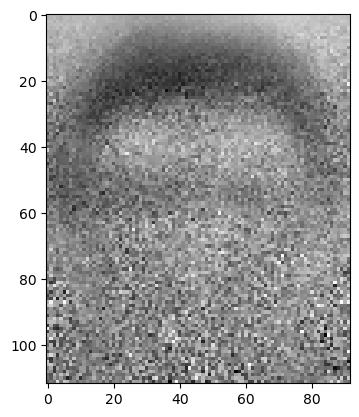

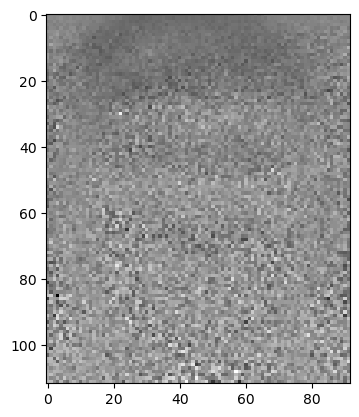

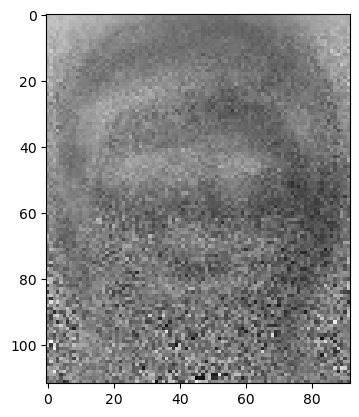

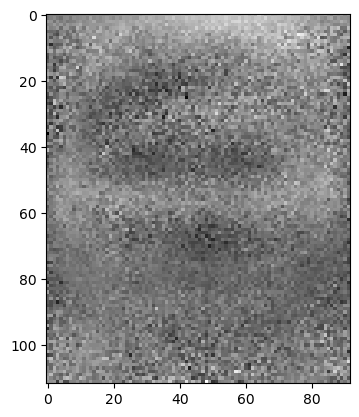

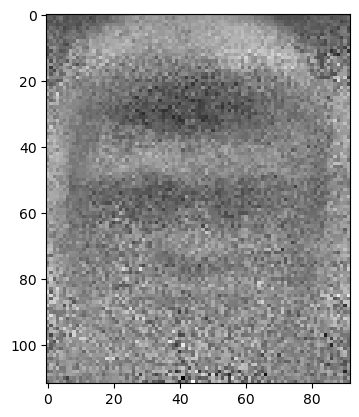

In [ ]:
for i in range(5):
    plt.imshow(sorted_eigenvectors[:,i].reshape(112,92),cmap='gray')
    plt.show()

KNN with LDA

In [ ]:
# KNN with k = 1
def simpleClassifier(reducedTrainData,reducedTestData,trainTestLabels):
  n = KNeighborsClassifier(n_neighbors=1, weights='distance')
  n.fit(reducedTrainData, trainTestLabels)
  score = n.score(reducedTestData, trainTestLabels)
  y_pred=n.predict(reducedTestData)
  print(classification_report(trainTestLabels, y_pred))
  return score

simpleClassifier(D_reduced_train,D_reduced_test,trainData['label'])

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.62      1.00      0.77         5
          16       0.75      0.60      0.67         5
          17       1.00      1.00      1.00         5
          18       1.00    

0.95

Comparing with PCA
using k = 1 gives 0.95 accuracy in LDA , while it give 0.94 in PCA

Classifier Tuning

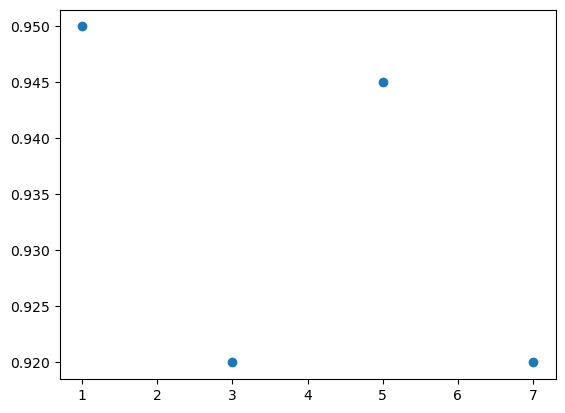

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.62      1.00      0.77         5
          16       0.75      0.60      0.67         5
          17       1.00      1.00      1.00         5
          18       1.00    

In [ ]:
Knn=[1,3,5,7]

def score_calc_LDA(Knn,projected_matrix_training, projected_matrix_testing, split_labels_vectors):
    accuracy = [0,0,0,0]
    y_pred = []
    for i in range(len(Knn)):
        x = KNeighborsClassifier(n_neighbors=Knn[i], weights='distance')
        x.fit(projected_matrix_training, split_labels_vectors)
        accuracy[i] = x.score(projected_matrix_testing, split_labels_vectors)
        y_pred.append(x.predict(projected_matrix_testing))
    plt.scatter(Knn, accuracy)
    plt.show()
    print(classification_report(split_labels_vectors, y_pred[0]))
    print(accuracy)

score_calc_LDA(Knn,D_reduced_train,D_reduced_test,trainData['label'])   

In [ ]:
def LDAalgorithm(trainData,testData,classesNumber) :

  meanMatrix = mean_matrix(trainData,classesNumber)
   
  totalMean = np.mean(trainData, axis=0)
  totalMean = totalMean[:-1]
  
  Sb = between_class_scatter_matrix(trainData,meanMatrix[:,:-1] ,totalMean,classesNumber)

  Z = center_class_matrices(trainData,meanMatrix,classesNumber)

  S = class_scatter_matrix_one(trainData,Z,classesNumber)

  W = np.dot(np.linalg.inv(S),Sb)
  eigen_values , eigen_vectors = np.linalg.eigh(W)

  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  U = sorted_eigenvectors[:,0:classesNumber-1]

  trainFaces = trainData.drop(["label"],axis=1)
  testFaces = testData.drop(["label"],axis=1)
  Data_reduced_train , Data_reduced_test = get_reduced_data(trainFaces,testFaces,U)

  return Data_reduced_train , Data_reduced_test

# Bonus

B) Change the number of instances per subject to be 7 and keep 3 instances per subject for testing.

In [ ]:
# 70% for training , 30% for testing.
from sklearn.model_selection import train_test_split
x = df.drop(['label'],axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100,stratify=y)

print(x_train)
print(y_train)

     0      1      2      3      4      5      6      7      8      9      \
273  124.0  123.0  126.0  123.0  125.0  121.0  126.0  122.0  121.0  122.0   
145  117.0  122.0  120.0  122.0  120.0  124.0  121.0  119.0  121.0  122.0   
84   114.0  110.0  112.0  113.0  113.0  111.0  113.0  111.0  110.0  114.0   
160   56.0   61.0   54.0   58.0   58.0   60.0   58.0   63.0   58.0   57.0   
332   24.0   26.0   27.0   26.0   25.0   26.0   25.0   27.0   26.0   28.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
366   47.0   50.0   52.0   50.0   52.0   47.0   54.0   51.0   55.0   52.0   
353   48.0   42.0   52.0   42.0   48.0   47.0   48.0   44.0   50.0   46.0   
263   46.0   42.0   46.0   38.0   48.0   43.0   45.0   45.0   43.0   48.0   
290  111.0  107.0  109.0  106.0  109.0  111.0  105.0  109.0  106.0  110.0   
208  104.0  108.0  105.0  106.0  105.0  106.0  110.0  104.0  105.0  105.0   

     ...  10294  10295  10296  10297  10298  10299  10300  10301  10302  10

KNN with PCA after the new splitting.

num_components =  40
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
      

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.60    

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.33      0.67      0.44         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.60    

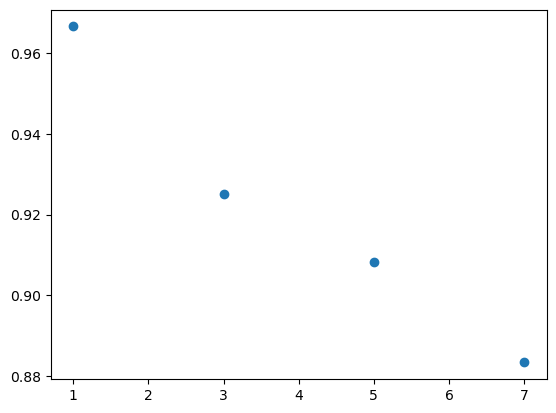

num_components =  60
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
      

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.60    

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.60    

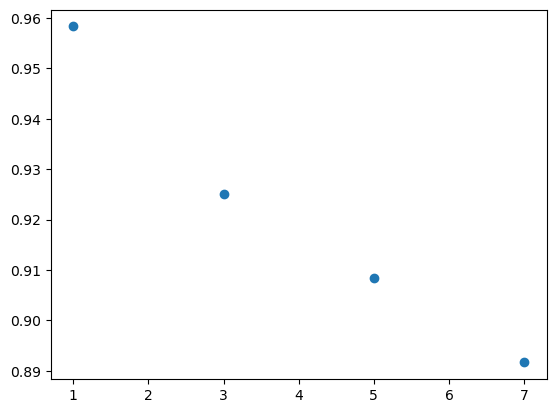

num_components =  92
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
      

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.75    

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.60    

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.60    

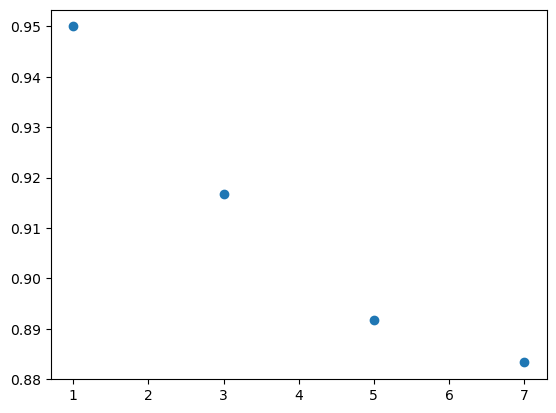

num_components =  148
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
     

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.60    

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.40      0.67      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.33      0.50         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00      1.00      1.00         3
          18       0.60    

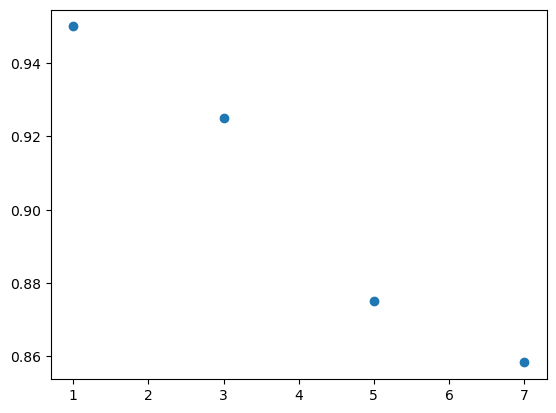

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

alphas=[0.8,0.85,0.9,0.95]

for alpha in alphas:
  Knn=[1,3,5,7]
  accuracies = [0,0,0,0]
  counter = 0
  newReducedTraindata,newEVectors=pca_fun(x_train,alpha) # applying pca
  D_meaned_test = x_test - np.mean(x_test , axis = 0)
  newReducedTestdata = np.dot(D_meaned_test, newEVectors)
  for k in Knn: 
    neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
    neigh.fit(newReducedTraindata, y_train)
    score = neigh.score(newReducedTestdata, y_test)
    y_pred=neigh.predict(newReducedTestdata)
    print(classification_report(y_test, y_pred))
    accuracies[counter] = score
    counter = counter+1
  
  print("Alpha : " , alpha)
  plt.scatter(Knn, accuracies)
  plt.show()

Applying LDA after the new splitting

In [ ]:
dfTrain = pd.DataFrame(data=x_train)
dfTrain['label']=y_train

dfTest = pd.DataFrame(data=x_test)
dfTest['label']=y_test

In [ ]:
Data_reduced_train , Data_reduced_test = LDAalgorithm(dfTrain,dfTest,40)

print(Data_reduced_train)
print(Data_reduced_train.shape)
print(Data_reduced_test)
print(Data_reduced_test.shape)

[[-5.44601495e+03 -1.06127521e+03  4.52385100e+03 ...  3.02895773e+02
   7.98128843e+01 -3.28266532e+02]
 [-4.78310120e+03  1.88090553e+02  3.69357930e+03 ...  3.10183758e+02
   2.24802464e+02 -5.97507010e+02]
 [-4.29331499e+03  4.43452712e+02  4.60085898e+03 ...  5.24948333e+02
   5.84659586e+02 -5.44090855e+02]
 ...
 [-5.25876473e+03  1.61426226e+02  4.87273461e+03 ...  7.18720969e+02
   3.82598557e+02 -7.54047126e+02]
 [-3.42731627e+03  8.80657120e+02  3.79345788e+03 ...  5.00602909e+02
   2.57961584e+02 -6.59783557e+02]
 [-3.90395116e+03  6.38623837e+02  3.39989334e+03 ...  3.27885505e+02
   5.90442729e-01 -4.14819136e+02]]
(280, 39)
[[-3966.93166308   817.15259608  3828.13492614 ...   313.92310834
    -88.05803816  -174.41534932]
 [-3789.586874     157.91362828  4601.69162848 ...   505.32101558
    341.07008771  -749.44922483]
 [-4963.25510184   301.92555375  4309.47632713 ...   257.77436319
    152.22293023  -386.89773197]
 ...
 [-4626.61456484   451.29466904  4719.68739527 ...  

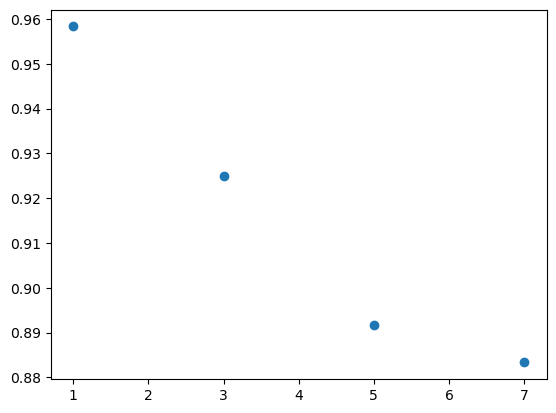

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       0.75    

In [ ]:
Knn=[1,3,5,7]
accuracylda = [0,0,0,0]
y_pred = []

for i in range(len(Knn)):
  n = KNeighborsClassifier(n_neighbors=Knn[i], weights='distance')
  n.fit(Data_reduced_train,y_train)
  accuracylda[i] =  n.score(Data_reduced_test, y_test)
  y_pred.append(n.predict(Data_reduced_test))
plt.scatter(Knn, accuracylda)
plt.show()

print(classification_report(y_test, y_pred[0]))
print(accuracylda)
